# NBA Data Analysis

In this analysis, we will delve into the NBA player stats spanning more than three decades, encompassing a wide range of data points including scoring averages, shooting percentages, player positions, foul frequency, and player efficiency ratings. Through this analysis, we seek to provide a comprehensive understanding of player performance, team dynamics, and the broader trends that have shaped the NBA over the years. Here are some questions I want to answer when analyzing NBA player stats for the season from 1992 to 2023:
1. Who were the top scorers in each season? How did their scoring averages change over time?
2. How did the average offensive rating per game change over the years? Are there any noticeable trends or fluctuations?
3. How did player performance vary based on their position (point guard, shooting guard, small forward, power forward, center) over the years?
4. How did the distribution of minutes played by players vary across seasons? Were there any notable trends or shifts in playing time allocation?

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) # display all columns in a wide DataFrame
pd.set_option('display.max_rows', None) # display all rows in a long DataFrame

In [55]:
player_stats = pd.read_csv('cleaned_player_stats.csv')
player_stats.drop(columns=['Unnamed: 0'], inplace=True)
team_ratings = pd.read_csv('cleaned_team_ratings.csv')
team_ratings.drop(columns=['Unnamed: 0'], inplace=True)

In [56]:
player_stats.head()

,Player,Pos,Age,Team,Games,Started,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,Forward,23,POR,71,1,934.0,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,1992
1,Mahmoud Abdul-Rauf,Guard,22,DEN,81,11,1538.0,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,1992
2,Mark Acres,Center,29,ORL,68,6,926.0,78.0,151.0,0.517,1.0,3.0,0.333,77.0,148.0,0.520,0.520,51.0,67.0,0.761,97.0,155.0,252.0,22.0,25.0,15.0,33.0,140.0,208.0,1992
3,Michael Adams,Guard,29,WSB,78,78,2795.0,485.0,1233.0,0.393,125.0,386.0,0.324,360.0,847.0,0.425,0.444,313.0,360.0,0.869,58.0,252.0,310.0,594.0,145.0,9.0,212.0,162.0,1408.0,1992
4,Rafael Addison,Forward,27,NJN,76,8,1175.0,187.0,432.0,0.433,14.0,49.0,0.286,173.0,383.0,0.452,0.449,56.0,76.0,0.737,65.0,100.0,165.0,68.0,28.0,28.0,46.0,109.0,444.0,1992


In [57]:
team_ratings.head()

,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,Chicago Bulls,E,C,67,15,0.817,10.44,116.32,105.35,10.97,10.07,116.12,105.52,10.61,1992
1,Portland Trail Blazers,W,P,57,25,0.695,7.27,111.98,104.71,7.27,6.94,111.85,104.94,6.91,1992
2,Utah Jazz,W,M,55,27,0.671,6.39,112.68,106.13,6.55,5.70,112.59,106.77,5.82,1992
3,Phoenix Suns,W,P,53,29,0.646,5.94,112.51,106.70,5.82,5.69,112.50,106.96,5.54,1992
4,Cleveland Cavaliers,E,C,57,25,0.695,5.45,114.32,108.71,5.61,5.34,114.26,108.73,5.53,1992


### Correlation between stats

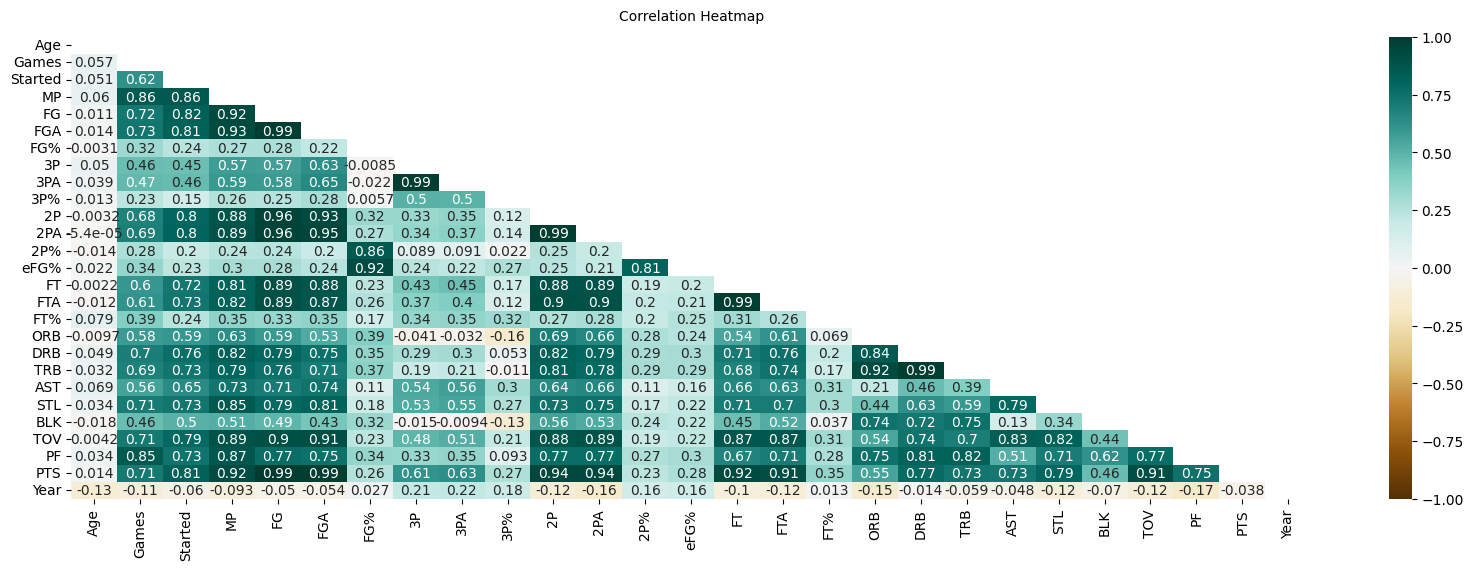

In [58]:
plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(player_stats.corr(numeric_only=True), dtype=bool))
heatmap = sns.heatmap(player_stats.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

### Who were the top scorers in each season? How did their scoring averages change over time?

In [59]:
top_scorers = player_stats.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending=False).head(1))
top_scorers

,,Player,Pos,Age,Team,Games,Started,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1992,179,Michael Jordan,Guard,28,CHI,80,80,3102.0,943.0,1818.0,0.519,27.0,100.0,0.270,916.0,1718.0,0.533,0.526,491.0,590.0,0.832,91.0,420.0,511.0,489.0,182.0,75.0,200.0,201.0,2404.0,1992
1993,562,Michael Jordan,Guard,29,CHI,78,78,3067.0,992.0,2003.0,0.495,81.0,230.0,0.352,911.0,1773.0,0.514,0.515,476.0,569.0,0.837,135.0,387.0,522.0,428.0,221.0,61.0,207.0,188.0,2541.0,1993
1994,1088,David Robinson,Center,28,SAS,80,80,3241.0,840.0,1658.0,0.507,10.0,29.0,0.345,830.0,1629.0,0.510,0.510,693.0,925.0,0.749,241.0,614.0,855.0,381.0,139.0,265.0,253.0,228.0,2383.0,1994
1995,1442,Shaquille O'Neal,Center,22,ORL,79,79,2923.0,930.0,1594.0,0.583,0.0,5.0,0.000,930.0,1589.0,0.585,0.583,455.0,854.0,0.533,328.0,573.0,901.0,214.0,73.0,192.0,204.0,258.0,2315.0,1995
1996,1774,Michael Jordan,Guard,32,CHI,82,82,3090.0,916.0,1850.0,0.495,111.0,260.0,0.427,805.0,1590.0,0.506,0.525,548.0,657.0,0.834,148.0,395.0,543.0,352.0,180.0,42.0,197.0,195.0,2491.0,1996
1997,2204,Michael Jordan,Guard,33,CHI,82,82,3106.0,920.0,1892.0,0.486,111.0,297.0,0.374,809.0,1595.0,0.507,0.516,480.0,576.0,0.833,113.0,369.0,482.0,352.0,140.0,44.0,166.0,156.0,2431.0,1997
1998,2656,Michael Jordan,Guard,34,CHI,82,82,3181.0,881.0,1893.0,0.465,30.0,126.0,0.238,851.0,1767.0,0.482,0.473,565.0,721.0,0.784,130.0,345.0,475.0,283.0,141.0,45.0,185.0,151.0,2357.0,1998
1999,3177,Shaquille O'Neal,Center,26,LAL,49,49,1705.0,510.0,885.0,0.576,0.0,1.0,0.000,510.0,884.0,0.577,0.576,269.0,498.0,0.540,187.0,338.0,525.0,114.0,36.0,82.0,122.0,155.0,1289.0,1999
2000,3626,Shaquille O'Neal,Center,27,LAL,79,79,3163.0,956.0,1665.0,0.574,0.0,1.0,0.000,956.0,1664.0,0.575,0.574,432.0,824.0,0.524,336.0,742.0,1078.0,299.0,36.0,239.0,223.0,255.0,2344.0,2000


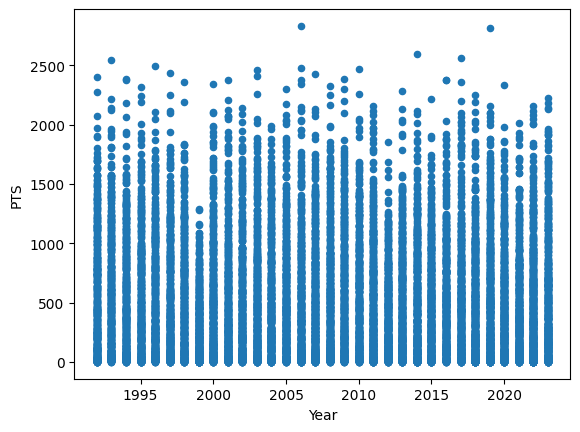

In [23]:
player_stats.plot.scatter(x='Year', y='PTS')
plt.show()

In the 1990s, teams focused on physicality and defensive strategies, resulting in lower scoring averages. The average score per game dropped below 100 points, and individual scoring averages were generally lower compared to now. In the 2000s, rule changes and a shift in offensive strategies led to higher scoring averages once again. The NBA implemented rule changes to allow for more offensive freedom, and teams started emphasizing three-point shooting and fast-paced offenses.

### How did the average offensive rating per game change over the years? Are there any noticeable trends or fluctuations?

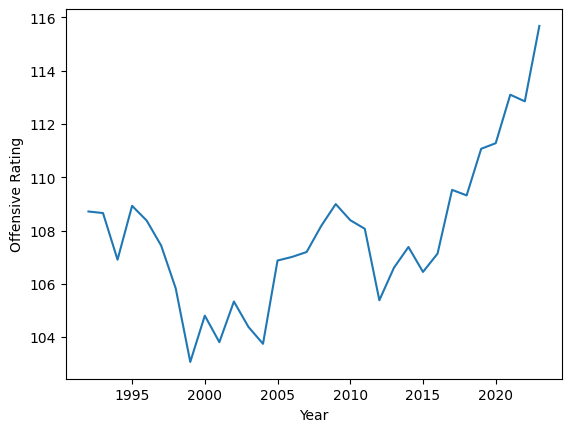

In [42]:
team_ratings.groupby('Year')['ORtg'].mean().plot()
plt.ylabel('Offensive Rating')
plt.show()

It's important to note that offensive ratings are influenced by several factors, including pace of play, scoring efficiency, and rule changes. The overall trend of increasing offensive ratings suggests a shift towards more efficient and higher-scoring offenses in recent years.

### How did player performance vary based on their position over the years?

In [82]:
cols = ['Games', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
        'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
player_stats.groupby(['Pos', 'Year'])[cols].sum()

Games        MP       FG       FGA      FG%       3P      3PA   
Pos     Year                                                                  
Center  1992   4288   91476.0  13891.0   28422.0   35.482    101.0    396.0  \
        1993   4198   88113.0  13808.0   27836.0   36.935     91.0    353.0   
        1994   4385   93242.0  15387.0   30704.0   40.653     74.0    339.0   
        1995   4338   99141.0  15254.0   30373.0   36.370    247.0    799.0   
        1996   4354   94089.0  14298.0   28871.0   39.967    149.0    532.0   
        1997   4582   96749.0  13865.0   28204.0   41.955    224.0    701.0   
        1998   4665  103778.0  15326.0   31647.0   38.142    128.0    535.0   
        1999   2901   61663.0   8604.0   18116.0   39.664     44.0    199.0   
        2000   4749   99062.0  14625.0   30404.0   39.555    100.0    382.0   
        2001   4834  101007.0  13383.0   28408.0   41.319     86.0    364.0   
        2002   5051  102725.0  13897.0   28951.0   44.536    316.0    891.0   
        2003   5410  111352.0  14300.0   30229.0   44.214    150.0    497.0   
        2004   5038  102681.0  13122.0   27415.0   43.857    150.0    562.0   
        2005   5512  109399.0  14655.0   29745.0   50.001    256.0    795.0   
        2006   5305  105650.0  13421.0   26711.0   48.258     64.0    302.0   
        2007   5053  111935.0  16298.0   31806.0   45.194    305.0    945.0   
        2008   5286  115967.0  17241.0   34438.0   49.497    500.0   1520.0   
        2009   5355  116761.0  17659.0   34264.0   49.620    400.0   1177.0   
        2010   5059  111448.0  17198.0   33505.0   47.231    483.0   1474.0   
        2011   5377  111953.0  16723.0   32986.0   51.316    176.0    588.0   
        2012   3832   80126.0  11681.0   23277.0   47.279    115.0    443.0   
        2013   5068  107789.0  16853.0   33114.0   46.552    118.0    488.0   
        2014   4723   97771.0  15329.0   29879.0   46.096    429.0   1310.0   
        2015   4688  102397.0  16518.0   32251.0   43.735    331.0   1020.0   
        2016   4958  104909.0  17747.0   34319.0   47.684    635.0   1897.0   
        2017   5304  111150.0  19643.0   37218.0   51.556   1513.0   4286.0   
        2018   5598  114298.0  20164.0   37917.0   54.940   1715.0   4941.0   
        2019   5122  109230.0  20682.0   38065.0   50.187   1732.0   5205.0   
        2020   4600   93727.0  16605.0   31160.0   59.419   2361.0   7000.0   
        2021   4293   91236.0  16670.0   30411.0   53.010   1954.0   5601.0   
        2022   5016  104951.0  19228.0   35190.0   56.706   2538.0   7299.0   
        2023   5386  110388.0  20028.0   35252.0   60.991   2238.0   6379.0   
Forward 1992   9114  223766.0  39399.0   81461.0   70.485   1769.0   5458.0   
        1993   9777  233915.0  40583.0   84849.0   76.882   2001.0   6364.0   
        1994   9154  217121.0  35480.0   75451.0   72.810   2325.0   7188.0   
        1995   9265  218129.0  35368.0   74934.0   73.941   4102.0  11631.0   
        1996  10072  245551.0  38263.0   81465.0   80.770   4675.0  12893.0   
        1997   9726  241826.0  36956.0   79521.0   78.578   4376.0  12422.0   
        1998   9865  239450.0  36890.0   80233.0   78.698   3416.0  10015.0   
        1999   6382  151291.0  22205.0   49924.0   75.911   2193.0   6381.0   
        2000  10307  251351.0  39753.0   86884.0   80.444   4220.0  11973.0   
        2001   9951  242232.0  37867.0   84202.0   75.609   4261.0  12269.0   
        2002   9341  233843.0  36151.0   80333.0   72.586   4131.0  12005.0   
        2003   8979  228375.0  35415.0   78960.0   66.835   4580.0  13173.0   
        2004   9807  240427.0  36016.0   80564.0   78.150   4506.0  12808.0   
        2005   9514  241378.0  38301.0   84455.0   77.528   5235.0  14535.0   
        2006   9733  240691.0  37168.0   80674.0   77.470   5208.0  14737.0   
        2007   9739  229959.0  35176.0   76175.0   79.507   5522.0  15343.0   
        2008   9203  224547.0  35614.0   77200.0   74.706   5804

Centers have seen an increase in their involvement in scoring and playmaking, with improvements in field goal efficiency and three-point shooting. They remain crucial in rebounding and contribute defensively with blocks and steals.

Forwards have become more versatile players, with increased scoring involvement, particularly from beyond the arc. They excel in rebounding, contribute to playmaking, and make defensive contributions with steals and blocks.

Guards have showcased their scoring ability, with a significant increase in three-point shooting. They contribute to playmaking and have seen improvements in field goal efficiency. While not primary rebounders, guards play an essential role in orchestrating the offense and making defensive contributions.

### How did the distribution of minutes played by players vary across seasons? Were there any notable trends or shifts in playing time allocation?

In [96]:
mpg = ['Games', 'MP']
stats_by_year = player_stats.groupby('Year')[mpg].sum()
stats_by_year['MPG'] = stats_by_year['MP'] / stats_by_year['Games']

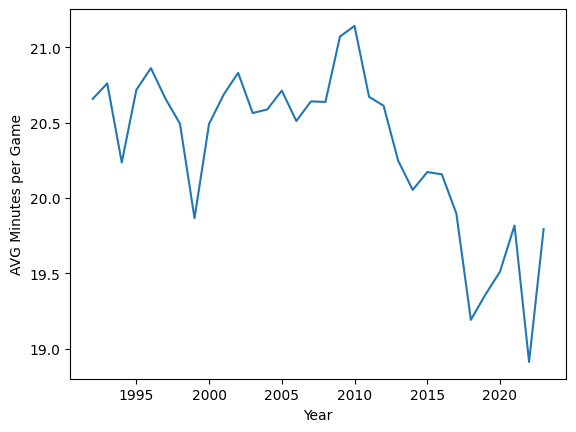

In [110]:
player_stats.groupby('Year')['MPG'].mean().plot()
plt.ylabel('AVG Minutes per Game')
plt.show()

There has been a slight decline in average minutes played per game. The average minutes dipped below 20 in 2018, reaching 19.19, and has remained relatively stable around that range in recent years, with 2022 having the lowest average at 18.91. This shift suggests a potential change in coaching strategies, such as increased emphasis on player rotations, load management, and a greater focus on preserving player health and minimizing fatigue. It could also be attributed to the increased depth and specialization of teams' rosters, leading to a more even distribution of playing time among players.